## library

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
from sklearn.preprocessing import LabelEncoder
from joblib import dump

# akuisisi data, preproses, dan fitur

In [2]:
minmax = MinMaxScaler()
sm = SMOTE(random_state=30)
le = LabelEncoder()

hrv_smote_accuracy_ = []
rmsdd_smote_accuracy_ = []
sdnn_smote_accuracy_ = []
total_smote_accuracy_ = []
hrv_accuracy_ = []
rmsdd_accuracy_ = []
sdnn_accuracy_ = []
total_accuracy_ = []
x_y_totall = []
x_rmsdd_smote_pred_matrixknn = []
x_rmsdd_smote_pred_cm = []

label = os.listdir()
for i in range(0,len(label)-1):
    data = pd.read_excel(label[i])
    x_hrv = data[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_rmsdd = data[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_sdnn = data[['BPM','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_total = data[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    y_klasifikasi = data['KECEMASAN']

    y_klasifikasi_le = le.fit(y_klasifikasi)
    y_klasifikasi_le = y_klasifikasi_le.transform(y_klasifikasi)
    y_klasifikasi_le = pd.DataFrame(y_klasifikasi_le)

    x_hrv = minmax.fit_transform(x_hrv)
    x_rmsdd = minmax.fit_transform(x_rmsdd)
    x_sdnn = minmax.fit_transform(x_sdnn)
    x_total = minmax.fit_transform(x_total)

    df_x_total = pd.DataFrame(x_total)
    x_y_total = pd.concat([df_x_total,y_klasifikasi_le],axis=1)
    x_y_totall.append(x_y_total)

    x_hrv_smote,y_hrv_smote = sm.fit_resample(x_hrv,y_klasifikasi)
    x_rmsdd_smote,y_rmsdd_smote = sm.fit_resample(x_rmsdd,y_klasifikasi)
    x_sdnn_smote,y_sdnn_smote = sm.fit_resample(x_sdnn,y_klasifikasi)
    x_total_smote,y_total_smote = sm.fit_resample(x_total,y_klasifikasi)

    x_hrv_smote_train, x_hrv_smote_test, y_hrv_smote_train, y_hrv_smote_test = train_test_split(x_hrv_smote, y_hrv_smote, test_size= 0.2, random_state=20)
    x_rmsdd_smote_train, x_rmsdd_smote_test, y_rmsdd_smote_train, y_rmsdd_smote_test = train_test_split(x_rmsdd_smote, y_rmsdd_smote, test_size= 0.2, random_state=20)
    x_sdnn_smote_train, x_sdnn_smote_test, y_sdnn_smote_train, y_sdnn_smote_test = train_test_split(x_sdnn_smote, y_sdnn_smote, test_size= 0.2, random_state=20)
    x_total_smote_train, x_total_smote_test, y_total_smote_train, y_total_smote_test = train_test_split(x_total_smote, y_total_smote, test_size= 0.2, random_state=20)

    x_hrv_train, x_hrv_test, y_hrv_train, y_hrv_test = train_test_split(x_hrv, y_klasifikasi_le, test_size= 0.2, random_state=20)
    x_rmsdd_train, x_rmsdd_test, y_rmsdd_train, y_rmsdd_test = train_test_split(x_rmsdd, y_klasifikasi_le, test_size= 0.2, random_state=20)
    x_sdnn_train, x_sdnn_test, y_sdnn_train, y_sdnn_test = train_test_split(x_sdnn, y_klasifikasi_le, test_size= 0.2, random_state=20)
    x_total_train, x_total_test, y_total_train, y_total_test = train_test_split(x_total, y_klasifikasi_le, test_size= 0.2, random_state=20)


    hrv_smote_accuracy = []
    rmsdd_smote_accuracy = []
    sdnn_smote_accuracy = []
    total_smote_accuracy = []
    hrv_smote_accuracy_.append(hrv_smote_accuracy)
    rmsdd_smote_accuracy_.append(rmsdd_smote_accuracy)
    sdnn_smote_accuracy_.append(sdnn_smote_accuracy)
    total_smote_accuracy_.append(total_smote_accuracy)
    
    hrv_accuracy = []
    rmsdd_accuracy = []
    sdnn_accuracy = []
    total_accuracy = []
    hrv_accuracy_.append(hrv_accuracy)
    rmsdd_accuracy_.append(rmsdd_accuracy)
    sdnn_accuracy_.append(sdnn_accuracy)
    total_accuracy_.append(total_accuracy)

    for i in range(1,51):
        k = i
        model = KNeighborsClassifier(n_neighbors=k)

        model.fit(x_hrv_smote_train,y_hrv_smote_train)
        hrv_smote_accuracy.append(model.score(x_hrv_smote_test, y_hrv_smote_test))
        
        model.fit(x_rmsdd_smote_train,y_rmsdd_smote_train)
        rmsdd_smote_accuracy.append(model.score(x_rmsdd_smote_test, y_rmsdd_smote_test))
        x_rmsdd_smote_pred = model.predict(x_rmsdd_smote_test)
        x_rmsdd_smote_pred_matrixknn.append(classification_report(y_rmsdd_smote_test, x_rmsdd_smote_pred))
        x_rmsdd_smote_pred_cm.append(confusion_matrix(y_rmsdd_smote_test, x_rmsdd_smote_pred))


        model.fit(x_sdnn_smote_train,y_sdnn_smote_train)
        sdnn_smote_accuracy.append(model.score(x_sdnn_smote_test, y_sdnn_smote_test))

        model.fit(x_total_smote_train,y_total_smote_train)
        total_smote_accuracy.append(model.score(x_total_smote_test, y_total_smote_test))

        model.fit(x_hrv_train,y_hrv_train)
        hrv_accuracy.append(model.score(x_hrv_test, y_hrv_test))
        
        model.fit(x_rmsdd_train,y_rmsdd_train)
        rmsdd_accuracy.append(model.score(x_rmsdd_test, y_rmsdd_test))
        x_rmsdd_pred = model.predict(x_rmsdd_test)
        # x_rmsdd_pred_matrixknn.append(classification_report(y_rmsdd_test, x_rmsdd_pred))
        # x_rmsdd_pred_cm.append(confusion_matrix(y_rmsdd_test, x_rmsdd_pred))


        model.fit(x_sdnn_train,y_sdnn_train)
        sdnn_accuracy.append(model.score(x_sdnn_test, y_sdnn_test))

        model.fit(x_total_train,y_total_train)
        total_accuracy.append(model.score(x_total_test, y_total_test))





C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [31]:
data = pd.read_excel('DATA_KNN_6000x1800_NEW.xlsx')
array = ['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']
x = data[array]
x_minmax = minmax.fit_transform(x)
y = data['KECEMASAN']

# x_smote,y_smote = sm.fit_resample(x_minmax,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=20)

knn_real_x_total_accuracy = []
for i in range(1,51):
    k = i
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)




    knn_real = pd.read_excel('../../hasil_real.xlsx')

    knn_real_x_hrv = knn_real[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    knn_real_x_rmsdd = knn_real[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    knn_real_x_sdnn = knn_real[['BPM','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    knn_real_x_total = knn_real[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    knn_real_y_klasifikasi = knn_real['KECEMASAN']

    knn_real_x_total_accuracy.append(knn_model.score(knn_real_x_total, knn_real_y_klasifikasi))




    # Specify the filename for the saved model
    # filename = 'knn_model.joblib'

    # Save the model to a file
    # dump(knn_model, filename)

In [35]:
pd.DataFrame(knn_real_x_total_accuracy)[0].nlargest(5)

30    0.500000
28    0.477778
29    0.455556
36    0.455556
31    0.444444
Name: 0, dtype: float64

In [6]:
# k = 3
# knn_model = KNeighborsClassifier(n_neighbors=k)
# knn_model.fit(x_hrv_smote_train,y_hrv_smote_train)


# from joblib import dump

# # Specify the filename for the saved model
# filename = 'knn_model.joblib'

# # Save the model to a file
# dump(knn_model, filename)

## Corelation

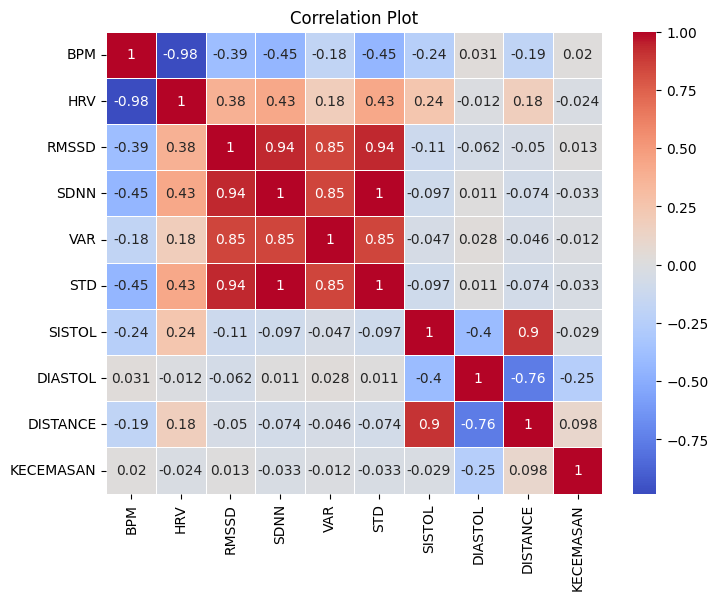

In [7]:
x_y_totall[2].columns = ['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE', 'KECEMASAN']
x_y_totall2_corr = x_y_totall[2].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(x_y_totall2_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

## akurasi

In [8]:
hrv_smote_accuracy_0 = pd.DataFrame(hrv_smote_accuracy_[0])
hrv_smote_accuracy_1 = pd.DataFrame(hrv_smote_accuracy_[1])
hrv_smote_accuracy_2 = pd.DataFrame(hrv_smote_accuracy_[2])
hrv_smote_accuracy_3 = pd.DataFrame(hrv_smote_accuracy_[3])

rmsdd_smote_accuracy_0 = pd.DataFrame(rmsdd_smote_accuracy_[0])
rmsdd_smote_accuracy_1 = pd.DataFrame(rmsdd_smote_accuracy_[1])
rmsdd_smote_accuracy_2 = pd.DataFrame(rmsdd_smote_accuracy_[2])
rmsdd_smote_accuracy_3 = pd.DataFrame(rmsdd_smote_accuracy_[3])

sdnn_smote_accuracy_0 = pd.DataFrame(sdnn_smote_accuracy_[0])
sdnn_smote_accuracy_1 = pd.DataFrame(sdnn_smote_accuracy_[1])
sdnn_smote_accuracy_2 = pd.DataFrame(sdnn_smote_accuracy_[2])
sdnn_smote_accuracy_3 = pd.DataFrame(sdnn_smote_accuracy_[3])

total_smote_accuracy_0 = pd.DataFrame(total_smote_accuracy_[0])
total_smote_accuracy_1 = pd.DataFrame(total_smote_accuracy_[1])
total_smote_accuracy_2 = pd.DataFrame(total_smote_accuracy_[2])
total_smote_accuracy_3 = pd.DataFrame(total_smote_accuracy_[3])


# hrv_smote_accuracy_0
print(f'hrv_smote_accuracy_0 \n{hrv_smote_accuracy_0[0].nlargest(5).mean()}')
print(f'hrv_smote_accuracy_1 \n{hrv_smote_accuracy_1[0].nlargest(5).mean()}')
print(f'hrv_smote_accuracy_2 \n{hrv_smote_accuracy_2[0].nlargest(5).mean()}')
print(f'hrv_smote_accuracy_3 \n{hrv_smote_accuracy_3[0].nlargest(5).mean()}')
print(f'rmsdd_smote_accuracy_0 \n{rmsdd_smote_accuracy_0[0].nlargest(5).mean()}')
print(f'rmsdd_smote_accuracy_1 \n{rmsdd_smote_accuracy_1[0].nlargest(5).mean()}')
print(f'rmsdd_smote_accuracy_2 \n{rmsdd_smote_accuracy_2[0].nlargest(5).mean()}')
print(f'rmsdd_smote_accuracy_3 \n{rmsdd_smote_accuracy_3[0].nlargest(5).mean()}')
print(f'sdnn_smote_accuracy_0 \n{sdnn_smote_accuracy_0[0].nlargest(5).mean()}')
print(f'sdnn_smote_accuracy_1 \n{sdnn_smote_accuracy_1[0].nlargest(5).mean()}')
print(f'sdnn_smote_accuracy_2 \n{sdnn_smote_accuracy_2[0].nlargest(5).mean()}')
print(f'sdnn_smote_accuracy_3 \n{sdnn_smote_accuracy_3[0].nlargest(5).mean()}')
print(f'total_smote_accuracy_0 \n{total_smote_accuracy_0[0].nlargest(5).mean()}')
print(f'total_smote_accuracy_1 \n{total_smote_accuracy_1[0].nlargest(5).mean()}')
print(f'total_smote_accuracy_2 \n{total_smote_accuracy_2[0].nlargest(5).mean()}')
print(f'total_smote_accuracy_3 \n{total_smote_accuracy_3[0].nlargest(5).mean()}')


hrv_smote_accuracy_0 
0.7422222222222222
hrv_smote_accuracy_1 
0.7259259259259259
hrv_smote_accuracy_2 
0.7844444444444444
hrv_smote_accuracy_3 
0.8488888888888889
rmsdd_smote_accuracy_0 
0.7355555555555556
rmsdd_smote_accuracy_1 
0.728395061728395
rmsdd_smote_accuracy_2 
0.7777777777777778
rmsdd_smote_accuracy_3 
0.8755555555555556
sdnn_smote_accuracy_0 
0.74
sdnn_smote_accuracy_1 
0.725925925925926
sdnn_smote_accuracy_2 
0.7733333333333333
sdnn_smote_accuracy_3 
0.868888888888889
total_smote_accuracy_0 
0.7355555555555556
total_smote_accuracy_1 
0.7407407407407407
total_smote_accuracy_2 
0.7844444444444444
total_smote_accuracy_3 
0.8733333333333334


In [3]:
hrv_accuracy_0 = pd.DataFrame(hrv_accuracy_[0])
hrv_accuracy_1 = pd.DataFrame(hrv_accuracy_[1])
hrv_accuracy_2 = pd.DataFrame(hrv_accuracy_[2])
hrv_accuracy_3 = pd.DataFrame(hrv_accuracy_[3])

rmsdd_accuracy_0 = pd.DataFrame(rmsdd_accuracy_[0])
rmsdd_accuracy_1 = pd.DataFrame(rmsdd_accuracy_[1])
rmsdd_accuracy_2 = pd.DataFrame(rmsdd_accuracy_[2])
rmsdd_accuracy_3 = pd.DataFrame(rmsdd_accuracy_[3])

sdnn_accuracy_0 = pd.DataFrame(sdnn_accuracy_[0])
sdnn_accuracy_1 = pd.DataFrame(sdnn_accuracy_[1])
sdnn_accuracy_2 = pd.DataFrame(sdnn_accuracy_[2])
sdnn_accuracy_3 = pd.DataFrame(sdnn_accuracy_[3])

total_accuracy_0 = pd.DataFrame(total_accuracy_[0])
total_accuracy_1 = pd.DataFrame(total_accuracy_[1])
total_accuracy_2 = pd.DataFrame(total_accuracy_[2])
total_accuracy_3 = pd.DataFrame(total_accuracy_[3])


# hrv_accuracy_0
print(f'hrv_accuracy_0 \n{hrv_accuracy_0[0].nlargest(5).mean()}')
print(f'hrv_accuracy_1 \n{hrv_accuracy_1[0].nlargest(5).mean()}')
print(f'hrv_accuracy_2 \n{hrv_accuracy_2[0].nlargest(5).mean()}')
print(f'hrv_accuracy_3 \n{hrv_accuracy_3[0].nlargest(5).mean()}')
print(f'rmsdd_accuracy_0 \n{rmsdd_accuracy_0[0].nlargest(5).mean()}')
print(f'rmsdd_accuracy_1 \n{rmsdd_accuracy_1[0].nlargest(5).mean()}')
print(f'rmsdd_accuracy_2 \n{rmsdd_accuracy_2[0].nlargest(5).mean()}')
print(f'rmsdd_accuracy_3 \n{rmsdd_accuracy_3[0].nlargest(5).mean()}')
print(f'sdnn_accuracy_0 \n{sdnn_accuracy_0[0].nlargest(5).mean()}')
print(f'sdnn_accuracy_1 \n{sdnn_accuracy_1[0].nlargest(5).mean()}')
print(f'sdnn_accuracy_2 \n{sdnn_accuracy_2[0].nlargest(5).mean()}')
print(f'sdnn_accuracy_3 \n{sdnn_accuracy_3[0].nlargest(5).mean()}')
print(f'total_accuracy_0 \n{total_accuracy_0[0].nlargest(5).mean()}')
print(f'total_accuracy_1 \n{total_accuracy_1[0].nlargest(5).mean()}')
print(f'total_accuracy_2 \n{total_accuracy_2[0].nlargest(5).mean()}')
print(f'total_accuracy_3 \n{total_accuracy_3[0].nlargest(5).mean()}')


hrv_accuracy_0 
0.6121212121212121
hrv_accuracy_1 
0.5599999999999999
hrv_accuracy_2 
0.7454545454545455
hrv_accuracy_3 
0.8454545454545453
rmsdd_accuracy_0 
0.6272727272727272
rmsdd_accuracy_1 
0.5533333333333333
rmsdd_accuracy_2 
0.7272727272727273
rmsdd_accuracy_3 
0.8696969696969697
sdnn_accuracy_0 
0.6272727272727272
sdnn_accuracy_1 
0.53
sdnn_accuracy_2 
0.7242424242424244
sdnn_accuracy_3 
0.8454545454545455
total_accuracy_0 
0.6393939393939394
total_accuracy_1 
0.5366666666666666
total_accuracy_2 
0.7484848484848484
total_accuracy_3 
0.8636363636363636


In [9]:
hrv_smote_accuracy_0_ = pd.DataFrame(hrv_smote_accuracy_0[0].nlargest(5))
hrv_smote_accuracy_1_ = pd.DataFrame(hrv_smote_accuracy_1[0].nlargest(5))
hrv_smote_accuracy_2_ = pd.DataFrame(hrv_smote_accuracy_2[0].nlargest(5))
hrv_smote_accuracy_3_ = pd.DataFrame(hrv_smote_accuracy_3[0].nlargest(5))
rmsdd_smote_accuracy_0_ = pd.DataFrame(rmsdd_smote_accuracy_0[0].nlargest(5))
rmsdd_smote_accuracy_1_ = pd.DataFrame(rmsdd_smote_accuracy_1[0].nlargest(5))
rmsdd_smote_accuracy_2_ = pd.DataFrame(rmsdd_smote_accuracy_2[0].nlargest(5))
rmsdd_smote_accuracy_3_ = pd.DataFrame(rmsdd_smote_accuracy_3[0].nlargest(5))
sdnn_smote_accuracy_0_ = pd.DataFrame(sdnn_smote_accuracy_0[0].nlargest(5))
sdnn_smote_accuracy_1_ = pd.DataFrame(sdnn_smote_accuracy_1[0].nlargest(5))
sdnn_smote_accuracy_2_ = pd.DataFrame(sdnn_smote_accuracy_2[0].nlargest(5))
sdnn_smote_accuracy_3_ = pd.DataFrame(sdnn_smote_accuracy_3[0].nlargest(5))
total_smote_accuracy_0_ = pd.DataFrame(total_smote_accuracy_0[0].nlargest(5))
total_smote_accuracy_1_ = pd.DataFrame(total_smote_accuracy_1[0].nlargest(5))
total_smote_accuracy_2_ = pd.DataFrame(total_smote_accuracy_2[0].nlargest(5))
total_smote_accuracy_3_ = pd.DataFrame(total_smote_accuracy_3[0].nlargest(5))

In [10]:
hrv_smote_accuracy_0_.columns = ['hrv_smote_accuracy_0']
hrv_smote_accuracy_1_.columns = ['hrv_smote_accuracy_1']
hrv_smote_accuracy_2_.columns = ['hrv_smote_accuracy_2']
hrv_smote_accuracy_3_.columns = ['hrv_smote_accuracy_3']
rmsdd_smote_accuracy_0_.columns = ['rmsdd_smote_accuracy_0']
rmsdd_smote_accuracy_1_.columns = ['rmsdd_smote_accuracy_1']
rmsdd_smote_accuracy_2_.columns = ['rmsdd_smote_accuracy_2']
rmsdd_smote_accuracy_3_.columns = ['rmsdd_smote_accuracy_3']
sdnn_smote_accuracy_0_.columns = ['sdnn_smote_accuracy_0']
sdnn_smote_accuracy_1_.columns = ['sdnn_smote_accuracy_1']
sdnn_smote_accuracy_2_.columns = ['sdnn_smote_accuracy_2']
sdnn_smote_accuracy_3_.columns = ['sdnn_smote_accuracy_3']
total_smote_accuracy_0_.columns = ['total_smote_accuracy_0']
total_smote_accuracy_1_.columns = ['total_smote_accuracy_1']
total_smote_accuracy_2_.columns = ['total_smote_accuracy_2']
total_smote_accuracy_3_.columns = ['total_smote_accuracy_3']

In [11]:
df_acc = pd.concat([
hrv_smote_accuracy_0_,
hrv_smote_accuracy_1_,
hrv_smote_accuracy_2_,
hrv_smote_accuracy_3_,
rmsdd_smote_accuracy_0_,
rmsdd_smote_accuracy_1_,
rmsdd_smote_accuracy_2_,
rmsdd_smote_accuracy_3_,
sdnn_smote_accuracy_0_,
sdnn_smote_accuracy_1_,
sdnn_smote_accuracy_2_,
sdnn_smote_accuracy_3_,
total_smote_accuracy_0_,
total_smote_accuracy_1_,
total_smote_accuracy_2_,
total_smote_accuracy_3_,
],axis=1)

df_acc

hrv_smote_accuracy_0  hrv_smote_accuracy_1  hrv_smote_accuracy_2  \
0              0.788889              0.790123              0.844444   
4              0.733333              0.691358              0.755556   
5              0.733333                   NaN                   NaN   
6              0.733333                   NaN                   NaN   
1              0.722222              0.691358              0.788889   
3                   NaN              0.740741              0.744444   
2                   NaN              0.716049              0.788889   
7                   NaN                   NaN                   NaN   

   hrv_smote_accuracy_3  rmsdd_smote_accuracy_0  rmsdd_smote_accuracy_1  \
0              0.900000                0.755556                0.802469   
4              0.800000                     NaN                0.691358   
5                   NaN                0.722222                     NaN   
6                   NaN                     NaN                     NaN   
1              0.877778                0.722222                0.679012   
3              0.811111                0.733333                0.728395   
2              0.855556                0.744444                0.740741   
7                   NaN                     NaN                     NaN   

   rmsdd_smote_accuracy_2  rmsdd_smote_accuracy_3  sdnn_smote_accuracy_0  \
0                0.877778                0.933333               0.777778   
4                0.744444                0.822222               0.722222   
5                     NaN                     NaN               0.733333   
6                     NaN                     NaN               0.722222   
1                0.755556                0.900000                    NaN   
3                0.744444                0.855556                    NaN   
2                0.766667                0.866667               0.744444   
7                     NaN                     NaN                    NaN   

   sdnn_smote_accuracy_1  sdnn_smote_accuracy_2  sdnn_smote_accuracy_3  \
0               0.777778               0.844444               0.922222   
4               0.679012               0.755556               0.811111   
5                    NaN                    NaN                    NaN   
6                    NaN                    NaN                    NaN   
1               0.691358               0.755556               0.888889   
3               0.753086               0.733333               0.855556   
2               0.728395               0.777778               0.866667   
7                    NaN                    NaN                    NaN   

   total_smote_accuracy_0  total_smote_accuracy_1  total_smote_accuracy_2  \
0                0.777778                0.802469                0.855556   
4                0.722222                0.703704                0.722222   
5                     NaN                     NaN                     NaN   
6                     NaN                     NaN                     NaN   
1                0.733333                0.716049                0.788889   
3                     NaN                0.728395                0.766667   
2                0.722222                0.753086                0.788889   
7                0.722222                     NaN                     NaN   

   total_smote_accuracy_3  
0                0.933333  
4                0.811111  
5                     NaN  
6                     NaN  
1                0.911111  
3                0.833333  
2                0.877778  
7                     NaN

In [12]:
len(x_rmsdd_smote_pred_matrixknn)

200

In [7]:
hrv_accuracy_0_ = pd.DataFrame(hrv_accuracy_0[0].nlargest(5))
hrv_accuracy_1_ = pd.DataFrame(hrv_accuracy_1[0].nlargest(5))
hrv_accuracy_2_ = pd.DataFrame(hrv_accuracy_2[0].nlargest(5))
hrv_accuracy_3_ = pd.DataFrame(hrv_accuracy_3[0].nlargest(5))
rmsdd_accuracy_0_ = pd.DataFrame(rmsdd_accuracy_0[0].nlargest(5))
rmsdd_accuracy_1_ = pd.DataFrame(rmsdd_accuracy_1[0].nlargest(5))
rmsdd_accuracy_2_ = pd.DataFrame(rmsdd_accuracy_2[0].nlargest(5))
rmsdd_accuracy_3_ = pd.DataFrame(rmsdd_accuracy_3[0].nlargest(5))
sdnn_accuracy_0_ = pd.DataFrame(sdnn_accuracy_0[0].nlargest(5))
sdnn_accuracy_1_ = pd.DataFrame(sdnn_accuracy_1[0].nlargest(5))
sdnn_accuracy_2_ = pd.DataFrame(sdnn_accuracy_2[0].nlargest(5))
sdnn_accuracy_3_ = pd.DataFrame(sdnn_accuracy_3[0].nlargest(5))
total_accuracy_0_ = pd.DataFrame(total_accuracy_0[0].nlargest(5))
total_accuracy_1_ = pd.DataFrame(total_accuracy_1[0].nlargest(5))
total_accuracy_2_ = pd.DataFrame(total_accuracy_2[0].nlargest(5))
total_accuracy_3_ = pd.DataFrame(total_accuracy_3[0].nlargest(5))

In [8]:
hrv_accuracy_0_.columns = ['hrv_accuracy_0']
hrv_accuracy_1_.columns = ['hrv_accuracy_1']
hrv_accuracy_2_.columns = ['hrv_accuracy_2']
hrv_accuracy_3_.columns = ['hrv_accuracy_3']
rmsdd_accuracy_0_.columns = ['rmsdd_accuracy_0']
rmsdd_accuracy_1_.columns = ['rmsdd_accuracy_1']
rmsdd_accuracy_2_.columns = ['rmsdd_accuracy_2']
rmsdd_accuracy_3_.columns = ['rmsdd_accuracy_3']
sdnn_accuracy_0_.columns = ['sdnn_accuracy_0']
sdnn_accuracy_1_.columns = ['sdnn_accuracy_1']
sdnn_accuracy_2_.columns = ['sdnn_accuracy_2']
sdnn_accuracy_3_.columns = ['sdnn_accuracy_3']
total_accuracy_0_.columns = ['total_accuracy_0']
total_accuracy_1_.columns = ['total_accuracy_1']
total_accuracy_2_.columns = ['total_accuracy_2']
total_accuracy_3_.columns = ['total_accuracy_3']

In [9]:
df_acc = pd.concat([
hrv_accuracy_0_,
hrv_accuracy_1_,
hrv_accuracy_2_,
hrv_accuracy_3_,
rmsdd_accuracy_0_,
rmsdd_accuracy_1_,
rmsdd_accuracy_2_,
rmsdd_accuracy_3_,
sdnn_accuracy_0_,
sdnn_accuracy_1_,
sdnn_accuracy_2_,
sdnn_accuracy_3_,
total_accuracy_0_,
total_accuracy_1_,
total_accuracy_2_,
total_accuracy_3_,
],axis=1)

df_acc

hrv_accuracy_0  hrv_accuracy_1  hrv_accuracy_2  hrv_accuracy_3  \
0         0.681818        0.566667        0.803030        0.924242   
1         0.606061        0.550000        0.742424        0.818182   
5         0.606061             NaN             NaN             NaN   
3         0.590909        0.550000        0.742424        0.803030   
14        0.575758             NaN             NaN             NaN   
2              NaN        0.566667        0.727273        0.878788   
4              NaN        0.566667        0.712121        0.803030   
8              NaN             NaN             NaN             NaN   
6              NaN             NaN             NaN             NaN   
7              NaN             NaN             NaN             NaN   

    rmsdd_accuracy_0  rmsdd_accuracy_1  rmsdd_accuracy_2  rmsdd_accuracy_3  \
0           0.712121          0.566667          0.787879          0.939394   
1           0.636364          0.516667          0.696970          0.863636   
5           0.590909               NaN          0.712121          0.818182   
3           0.590909               NaN          0.727273               NaN   
14               NaN               NaN               NaN               NaN   
2                NaN          0.566667               NaN          0.893939   
4                NaN          0.583333          0.712121          0.833333   
8           0.606061               NaN               NaN               NaN   
6                NaN          0.533333               NaN               NaN   
7                NaN               NaN               NaN               NaN   

    sdnn_accuracy_0  sdnn_accuracy_1  sdnn_accuracy_2  sdnn_accuracy_3  \
0          0.681818         0.533333         0.772727         0.893939   
1          0.651515              NaN         0.712121         0.833333   
5               NaN              NaN         0.696970              NaN   
3          0.606061              NaN         0.742424         0.803030   
14              NaN              NaN              NaN              NaN   
2          0.606061         0.550000              NaN         0.878788   
4          0.590909         0.533333              NaN         0.818182   
8               NaN              NaN              NaN              NaN   
6               NaN         0.516667              NaN              NaN   
7               NaN         0.516667         0.696970              NaN   

    total_accuracy_0  total_accuracy_1  total_accuracy_2  total_accuracy_3  
0           0.712121          0.566667          0.787879          0.939394  
1           0.636364          0.516667          0.727273          0.863636  
5                NaN               NaN               NaN          0.833333  
3           0.636364          0.516667          0.757576               NaN  
14               NaN               NaN               NaN               NaN  
2           0.590909          0.550000          0.757576          0.863636  
4                NaN          0.533333          0.712121          0.818182  
8                NaN               NaN               NaN               NaN  
6                NaN               NaN               NaN               NaN  
7           0.621212               NaN               NaN               NaN

## klasifiksi report

In [13]:
print(x_rmsdd_smote_pred_matrixknn[150])


              precision    recall  f1-score   support

      normal       1.00      0.67      0.80        12
       parah       0.90      0.95      0.92        19
      ringan       1.00      1.00      1.00        19
sangat parah       1.00      1.00      1.00        17
      sedang       0.85      0.96      0.90        23

    accuracy                           0.93        90
   macro avg       0.95      0.91      0.92        90
weighted avg       0.94      0.93      0.93        90



## matrix konfusi

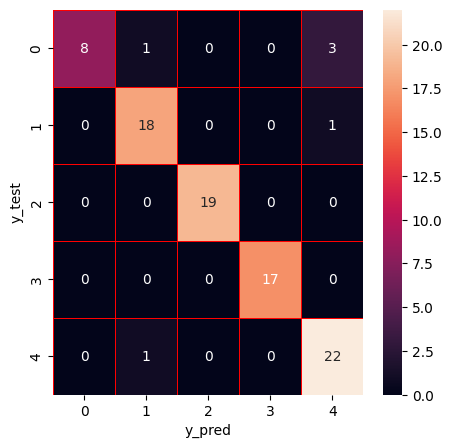

In [14]:
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(x_rmsdd_smote_pred_cm[150],annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()